# Lab One Exploring the data
## Team member
Xiaoqing Zou, Jonathan Mejia, Rongwei Ji

## Data introduction
Data source: https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster 

Data file name: Lab3/data/ObesityDataSet.csv

17 colums total, 2111 rows, it contains the categorical targets



## Preperation and Overview
### Task Explaination
This task is a classification problem designed to predict the degree of obesity based on given features (gender, age, height, weight, family history of obesity, smoking habits，etc). The degree of obesity can be categorized into several levels, such as Insufficient_Weight,Normal_Weight,Overweight_Level_I ,Overweight_Level_II,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III.


The business context of this task may lie in the healthcare sector, where doctors or health experts aim to assess the obesity risk of patients based on their features to develop personalized health management plans. Additionally, insurance companies might be interested as obesity can increase the risk of certain health issues, impacting insurance claim costs.


Stakeholders interested in the results include healthcare providers, health insurance companies, and individuals interested in managing their health. The model could be deployed in healthcare institutions or insurance company systems to assist decision-making or provide personalized recommendations.


### Data preperation
For this task, we would prepare our dataset by selecting relevant features such as gender, age, height, weight, family history of obesity, smoking habits,etc. We have do something preparation in Lab1 assignement, which I use the dataset for this lab3 assignment. After preprocessing, we will have a final dataset ready for classification.

In [2]:
# we could start with the lab1 data and show the preperation visualisation.
import pandas as pd
import numpy as np


print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)

df = pd.read_csv('ObesityDataSetOriginal.csv') # read in the csv file
print(df.info())
df.head()

Pandas: 1.5.3
Numpy: 1.26.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF   

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Data understanding
In the lab1 we have already know much about this dataset, and there are several attributes can contribute our target class( `NOBeyesdad`) and now we still can do something about the encoding to make them all numerical. After that we can using the regression to do test.

#### Encoding
We still need make all data are numeric, this part can directly using the code from our lab1 assignment.



In [3]:
df.replace(to_replace=['no','Sometimes','Frequently','Always','yes'],value=[0,1,2,3,1],inplace=True)
df.replace(to_replace=['Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Insufficient_Weight','Obesity_Type_II','Obesity_Type_III'],value=[1,2,3,4,0,5,6],inplace=True)
df.replace(to_replace=['Female','Male'],value=[0,1],inplace=True)
df.replace(to_replace=['Public_Transportation','Walking', 'Automobile', 'Motorbike', 'Bike'],value=[1,2,3,4,5],inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,1,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,1,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,2,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,1,3


In [4]:
df_describe=pd.DataFrame()
pd.set_option('max_colwidth',200)
df_describe['Attribute']=df.columns
df_describe['Description']=['Gender','Age','Height','Weight','family',
                            'Frequent consumption of high caloric food',
                            'Frequency of consumption of vegetables',
                            'Number of main meals',
                            'Consumption of food between meals',
                            'SMOKE',
                            'Consumption of water daily','Calories consumption monitoring',
                            "Physical activity frequency",
                          
                            "Time using technology devices",
                            "Consumption of alcohol",
                            "Transportation used","Obeyesdad"]
df_describe['Type']=['Bool,1/0','Interval,float','Ratio,float','Ratio,float','Bool,1/0','ratio,float','ratio,float','ratio,float','ratio,float',"Bool,1/0","Ordinal,int","Bool,1/0","ratio,float","ratio,float","Ordinal,int","norminal","Ordinal,int"]
df_describe['Convertion/Range']=['1=male,0=female',"14-65",'1.45-1.98','39-173','yes=1.no=0','1-3','1-3','1-3','0=no,1=sometimes,2=frequently,3=always','yes=1.no=0','1-3','yes=1.no=0','0-3','0-2','0=no,1=sometimes,2=frequently,3=always','','Normal_Weight=1,Overweight_Level_I=2 ,Overweight_Level_II=3,Obesity_Type_I=4, Insufficient_Weight=0,Obesity_Type_II=5,Obesity_Type_III=6']
df_describe

,Attribute,Description,Type,Convertion/Range
0,Gender,Gender,"Bool,1/0","1=male,0=female"
1,Age,Age,"Interval,float",14-65
2,Height,Height,"Ratio,float",1.45-1.98
3,Weight,Weight,"Ratio,float",39-173
4,family_history_with_overweight,family,"Bool,1/0",yes=1.no=0
5,FAVC,Frequent consumption of high caloric food,"ratio,float",1-3
6,FCVC,Frequency of consumption of vegetables,"ratio,float",1-3
7,NCP,Number of main meals,"ratio,float",1-3
8,CAEC,Consumption of food between meals,"ratio,float","0=no,1=sometimes,2=frequently,3=always"
9,SMOKE,SMOKE,"Bool,1/0",yes=1.no=0


Above table is currently data table, at this time we do not need to something missing handling and duplicate issue handling. We could focuing on the modeling and our main target.

`NObeyesdad` is our target for classification, and below is breakdown and distribution about this target of this dataset:

In [7]:
df.describe() # show the summary statistics

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,2.008011,0.045476,1.010298,0.657866,0.731407,1.488394,3.112269
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,0.868475,1.985062
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,1.000000,1.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000,1.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.477420,0.000000,1.666678,1.000000,1.000000,2.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,5.000000,6.000000


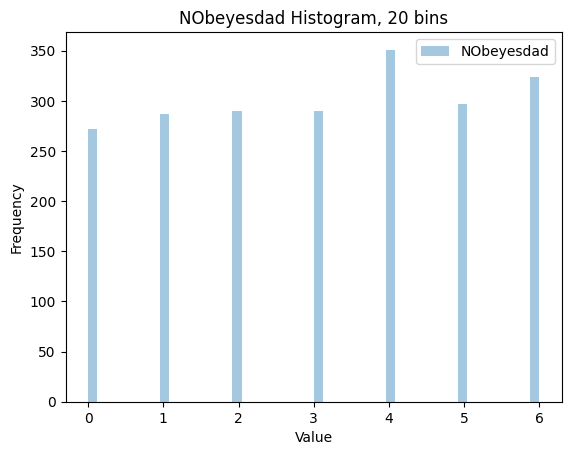

In [6]:
import matplotlib.pyplot as plt

df.NObeyesdad.plot(kind='hist',bins=50,alpha=0.4,label='NObeyesdad')
plt.title('NObeyesdad Histogram, 20 bins')
plt.xlabel("Value")
plt.legend()
plt.show()


### Data Splitting
We will split our dataset into training and testing sets using an 80/20 split, where 80% of the data will be used for training the model and 20% for testing its performance. This split is appropriate as it provides an adequate amount of data for training while still reserving a sizable portion for evaluation. With a larger training set, the model can learn more complex patterns in the data, leading to potentially better performance. However, it's essential to ensure that the testing set is representative of the overall data distribution to obtain reliable performance metrics.

In [68]:
# convert data into 80/20 split
from sklearn.model_selection import train_test_split
# define x and y of dataset
x = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']
# split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



### Argue "for" or "against" 80/20split
When we use the 80/20 split function to train model and test the model, we should consider the data balance or imbalance. Then we could determin is argueing or argue against the 80/20 split.

Now show the distribution about train and test

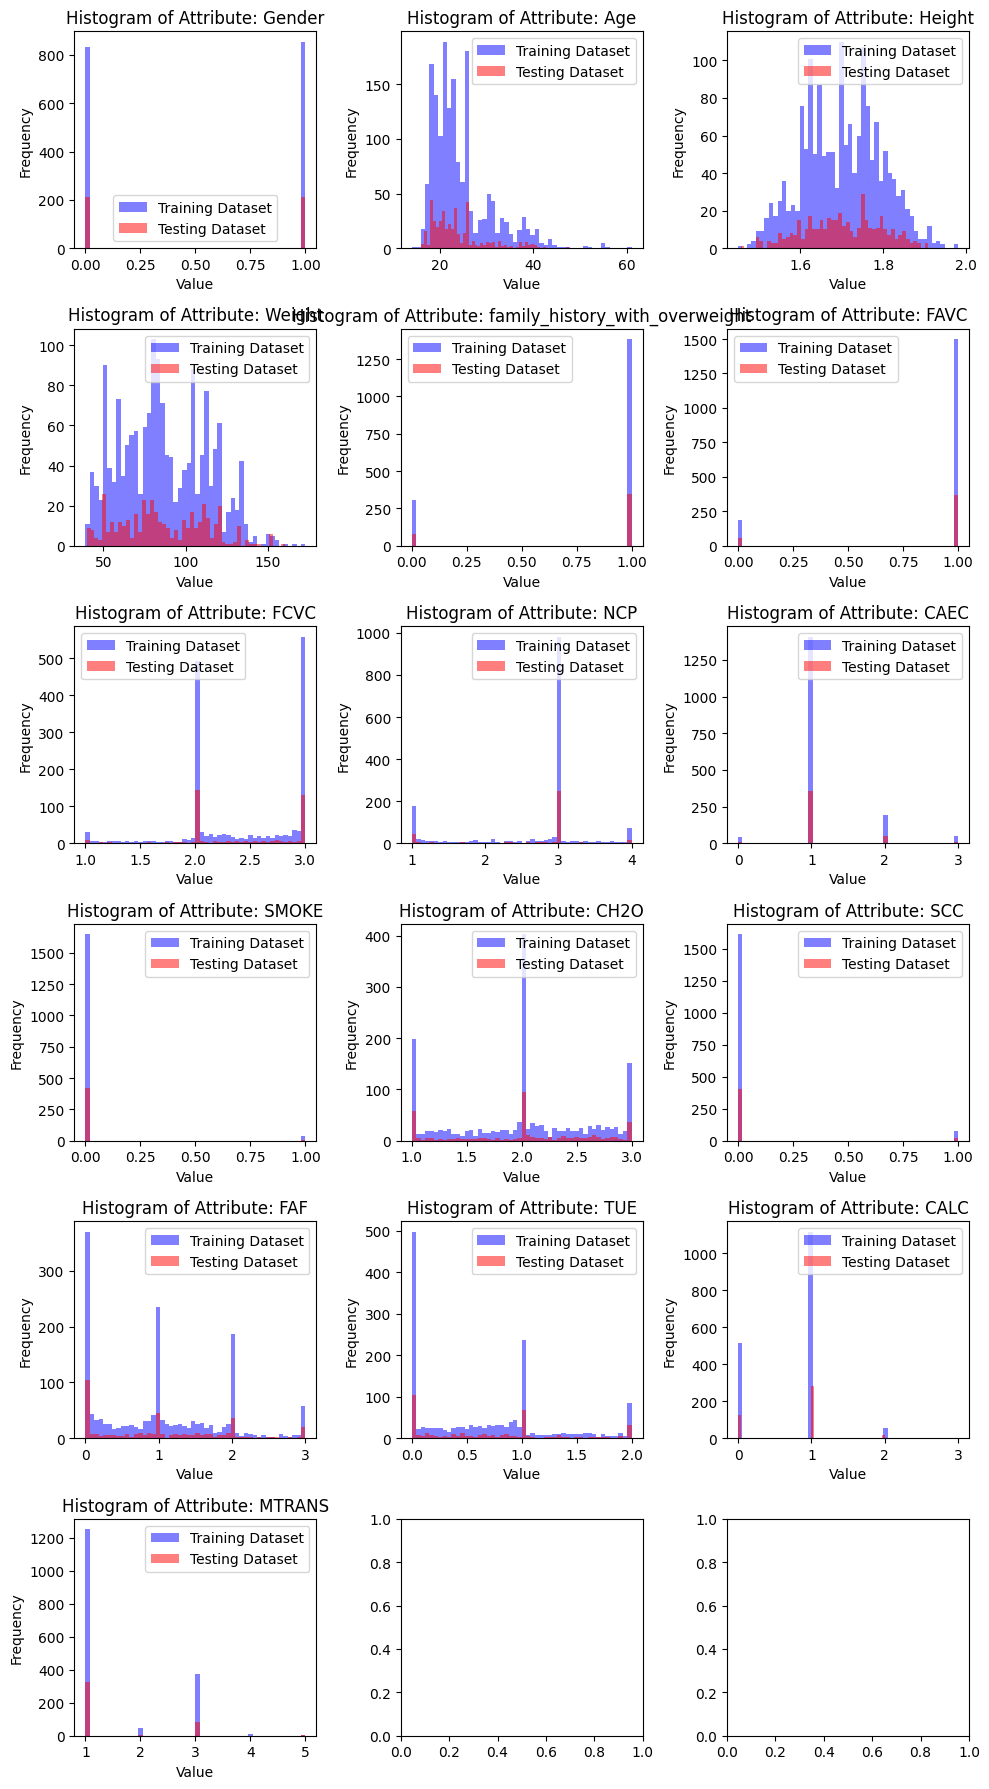

In [84]:
import matplotlib.pyplot as plt

# Number of attributes (columns)
num_attributes = len(x_train.columns)

# Calculate the number of rows and columns needed for the subplots
num_rows = (num_attributes + 2) // 3  # Round up to the nearest integer
num_cols = min(num_attributes, 3)     # Maximum 3 columns per row

# Set up subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))

# Plot histograms for each attribute
for i, col in enumerate(x_train.columns):
    row_index = i // 3  # Determine the row index for the subplot
    col_index = i % 3   # Determine the column index for the subplot
    
    # Plot histogram for training dataset
    axs[row_index, col_index].hist(x_train[col], bins=50, color='blue', alpha=0.5, label='Training Dataset')

    # Plot histogram for testing dataset
    axs[row_index, col_index].hist(x_test[col], bins=50, color='red', alpha=0.5, label='Testing Dataset')

    # Add labels and title
    axs[row_index, col_index].set_xlabel('Value')
    axs[row_index, col_index].set_ylabel('Frequency')
    axs[row_index, col_index].set_title(f'Histogram of Attribute: {col}')

    # Add legend
    axs[row_index, col_index].legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

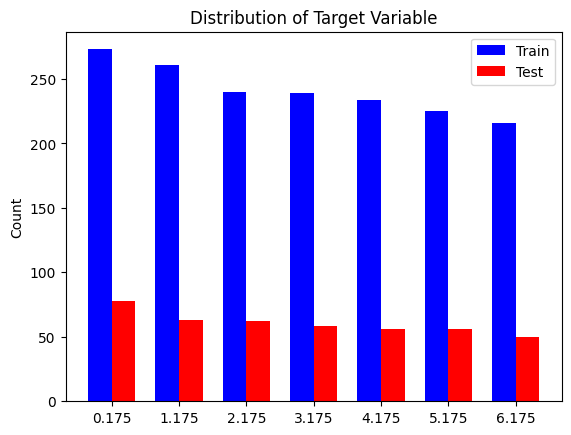

In [85]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots()

# Set the bar width
bar_width = 0.35

# Plot the bars for the first image
ax.bar(x, y_train.value_counts(), width=bar_width, label='Train', color='blue')
ax.bar([i + bar_width for i in x], y_test.value_counts(), width=bar_width, label='Test', color='red')
ax.set_xticks([i + bar_width/2 for i in x])
ax.set_ylabel('Count')
ax.set_title('Distribution of Target Variable')
ax.legend()
plt.show()


Based on the visualizaiton of the distribution of train and test, we could find 80/20 will be good split ratio to build and test model. There is no any extremly imbalance.

[0.9408284  0.93491124 0.95266272 0.94674556 0.91715976 0.91715976
 0.9408284  0.93491124 0.94047619 0.93452381]
Average 5-Fold CV Score: 0.9360207100591718
Standard deviation: 0.010836195355366703
Variance: 0.00011742312977967089


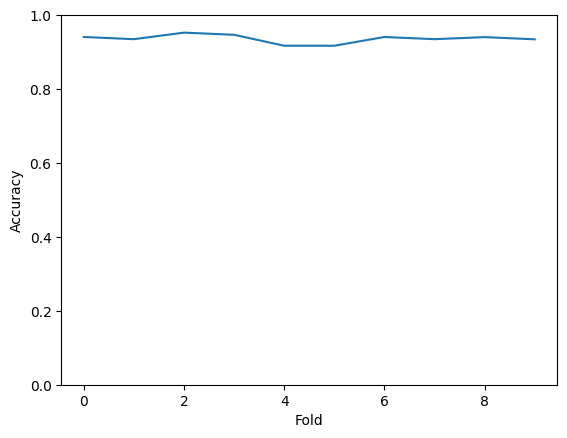

In [125]:
# using cross-validation to estimate the 80/20 split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
# split the data into 5 folds
cv_scores = cross_val_score(DecisionTreeClassifier(), x_train, y_train, cv=10)
# print the cross-validation scores
print(cv_scores)
# print the average cross-validation score
print('Average 5-Fold CV Score: {}'.format(np.mean(cv_scores)))
# print the standard deviation of the cross-validation scores
print('Standard deviation: {}'.format(np.std(cv_scores)))
# print the variance of the cross-validation scores
print('Variance: {}'.format(np.var(cv_scores)))
# show 10 fold cross validation in one plot, which y is from 0 to 1
# add the label for the x-axis and y-axis
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.plot(cv_scores)


Based on the analysis above, we could conclude that the 80/20 split will works for our dataset and the modeling below. It result the balance data in train and test, it also show the great result in cross validation.

## Modeling

###  one-versus-all logistic regression
We directly use the one vs all logistic regression code from the lecture to caculate our data.
It's based on the binary logistic Regression 



In [86]:
# reference from lecture
class BinaryLogisticRegressionBase:
    # private:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        return 'Base Binary Logistic Regression Object, Not Trainable'
    
    # convenience, private and static:
    @staticmethod
    def _sigmoid(theta):
        return 1/(1+np.exp(-theta)) 
    
    @staticmethod
    def _add_intercept(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    # public:
    def predict_proba(self, X, add_intercept=True):
        # add bias term if requested
        Xb = self._add_intercept(X) if add_intercept else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
    
    
        

# inherit from base class
class BinaryLogisticRegression(BinaryLogisticRegressionBase):
    #private:
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    def _get_gradient(self,X,y):
        # programming \sum_i (yi-g(xi))xi
        gradient = np.zeros(self.w_.shape) # set gradient to zero
        for (xi,yi) in zip(X,y):
            # the actual update inside of sum
            gradi = (yi - self.predict_proba(xi,add_intercept=False))*xi 
            # reshape to be column vector and add to gradient
            gradient += gradi.reshape(self.w_.shape) 
        
        return gradient/float(len(y))
       
    # public:
    def fit(self, X, y):
        Xb = self._add_intercept(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 

            

Base Binary Logistic Regression Object, Not Trainable
Untrained Binary Logistic Regression Object


In [87]:
%%time
# now lets do some vectorized coding
# reference from lecture
import numpy as np
from scipy.special import expit

class VectorBinaryLogisticRegression(BinaryLogisticRegression):
    # inherit from our previous class to get same functionality
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # but overwrite the gradient calculation
    def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_intercept=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        return gradient.reshape(self.w_.shape)

class LogisticRegression:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = (y==yval) # create a binary problem
            # train the binary classifier for this class
            blr = VectorBinaryLogisticRegression(self.eta,
                                                 self.iters)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row
    


Untrained MultiClass Logistic Regression Object
CPU times: total: 0 ns
Wall time: 0 ns


In [114]:
%%time
from sklearn.metrics import accuracy_score

lr = LogisticRegression(0.3,2110) # chanege the paremeters to get better accuracy
lr.fit(x_train,y_train)
#print(lr)

yhat = lr.predict(x_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

<timed exec>:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


Accuracy of:  0.33569739952718675
CPU times: total: 0 ns
Wall time: 3.93 s


At this time, we find the accuracy only 0.32. We could consider several reason and optimize it. And now we can try the sklearn to compared it.

In [115]:
%%time
from sklearn.linear_model import LogisticRegression as SKLogisticRegression

lr_sk = SKLogisticRegression(solver='liblinear') # all params default

lr_sk.fit(x_train,y_train)
#print(np.hstack((lr_sk.intercept_[:,np.newaxis],lr_sk.coef_)))
yhat = lr_sk.predict(x_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.7304964539007093
CPU times: total: 15.6 ms
Wall time: 30.6 ms


We can know the sklearn method has the better accuracy and the better perfomance and faster. Now we need something optimization about the original one.

### Optimize


### Optimization tech chooser

Different from the original one above we have a class to have a function to choose either steepest ascent, stochastic gradient ascent, and Newton's method. and call this by `solver` input

In [ ]:
class OptimizationSolver:
    def __init__(self, solver='steepest_ascent'):
        self.solver = solver

    def fit(self, X, y):
        if self.solver == 'steepest_ascent':
            self.steepest_ascent(X, y)
        elif self.solver == 'stochastic_gradient_ascent':
            self.stochastic_gradient_ascent(X, y)
        elif self.solver == 'newtons_method':
            self.newtons_method(X, y)
        else:
            raise ValueError("Invalid solver choice. Choose from 'steepest_ascent', 'stochastic_gradient_ascent', or 'newtons_method'.")

    def steepest_ascent(self, X, y):
        # Implement steepest ascent optimization here
        pass

    def stochastic_gradient_ascent(self, X, y):
        # Implement stochastic gradient ascent optimization here
        pass

    def newtons_method(self, X, y):
        # Implement Newton's method optimization here
        pass

# Example usage:
# Create an instance of OptimizationSolver with a chosen solver
solver = OptimizationSolver(solver='steepest_ascent')

# Train the model using the chosen optimization technique
solver.fit(x_train, y_train)


Refrence:
Our teams lab1 assignment:https://github.com/livingspring/CS7324As/blob/main/Lab1/LabOne.ipynb